# Análises do Pré-processamento:

### Importação das Bibliotecas:

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

----------------------------------------------

### Importação dos Datasets:

In [2]:
df = pd.read_csv('../../data/dataset_new_with_outliers.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,21685,1,1,0.015056,0.176471,2,3,1.755285,1.817117,1.780265,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,17289,1,1,0.014508,0.500000,3,3,2.753134,2.685959,2.622680,1,-0.333333,0.000000,0.000000,0.000000,2.431143e+05,0.205394
2,977,0,1,0.000650,0.600000,2,3,1.558699,1.606671,1.628411,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
3,913,0,1,0.196441,0.375000,3,3,2.357785,2.266714,2.276297,1,-0.054737,0.000000,0.000000,0.000534,5.186206e+04,0.000000
4,21399,1,1,0.047802,0.733333,2,3,1.546188,1.591537,1.563549,0,0.000000,0.000587,0.124307,0.002671,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,12869,1,1,0.064568,0.467742,3,3,1.734000,1.734000,3.769000,1,-0.066502,0.002566,0.274694,0.004274,5.516691e+05,0.412949
2173,4079,1,1,0.001711,0.545455,3,5,1.090000,1.090000,1.134046,1,0.164671,0.000268,0.070579,0.000534,3.628070e+05,0.189802
2174,346,0,1,0.029153,0.697674,3,3,2.269900,2.288400,2.309100,1,0.220386,0.028874,0.281274,0.030983,4.127310e+05,-0.963290
2175,1465,1,1,0.141557,0.285714,3,3,2.159300,2.411200,2.411200,1,0.524721,0.000895,0.009056,0.001068,2.404375e+08,6.803505


--------------------------------

### Matriz de Correlação:

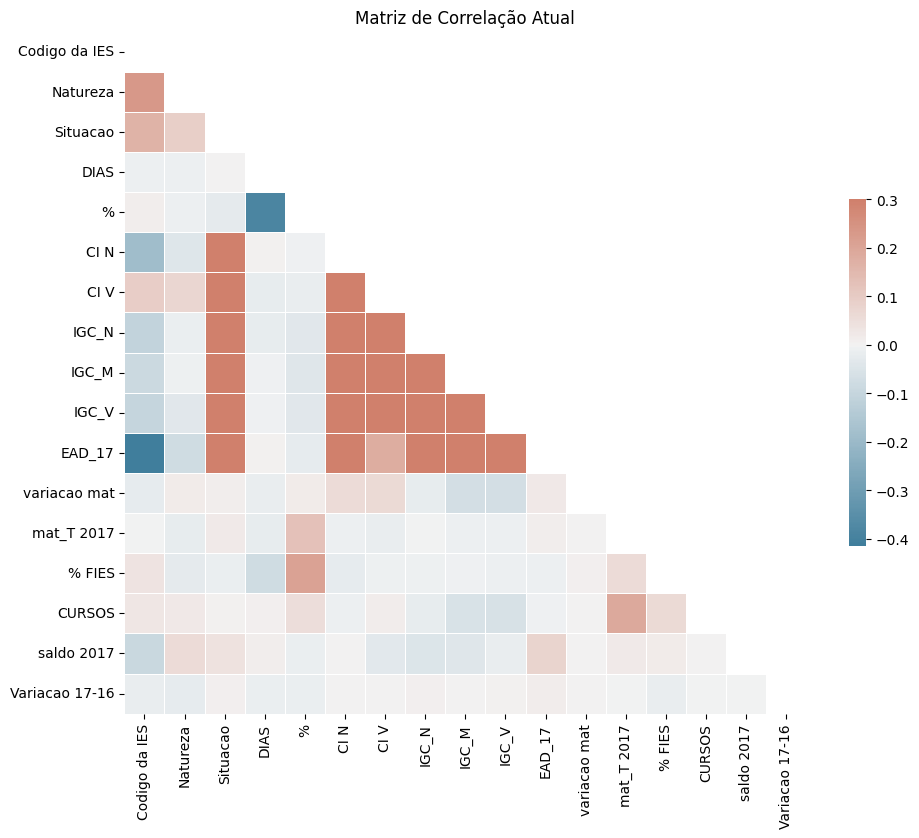

In [4]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlação Atual')
plt.savefig('./graphs/matrix_correlation.png')

---------------------------------

### Instituições Ativas vs Extintas:

* Histograma Ativas vs Extintas:

[Text(0, 0, 'Ativas'), Text(1, 0, 'Extintas')]

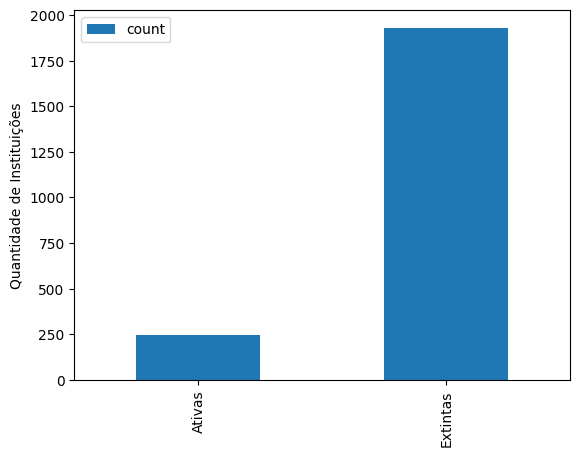

In [9]:
aux = df.groupby(['Situacao']).size().reset_index(name = 'count')
aux

ax = aux.plot.bar(y='count')
ax.set_ylabel('Quantidade de Instituições')
ax.set_xticklabels(['Ativas', 'Extintas'])

* Comparando IGCs:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

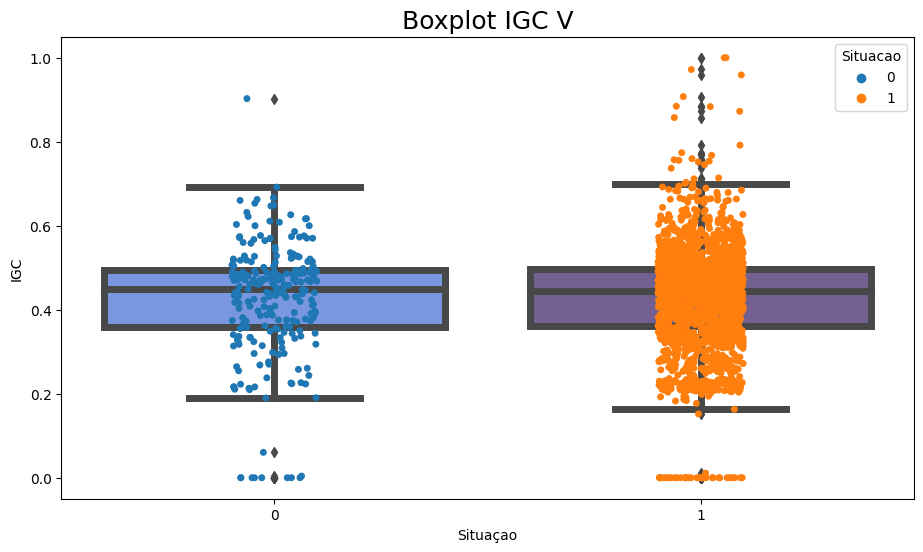

In [19]:

plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="IGC_V",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="IGC_V", hue="Situacao" ,data = df)  

plt.title("Boxplot IGC V", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("IGC")

plt.show()

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

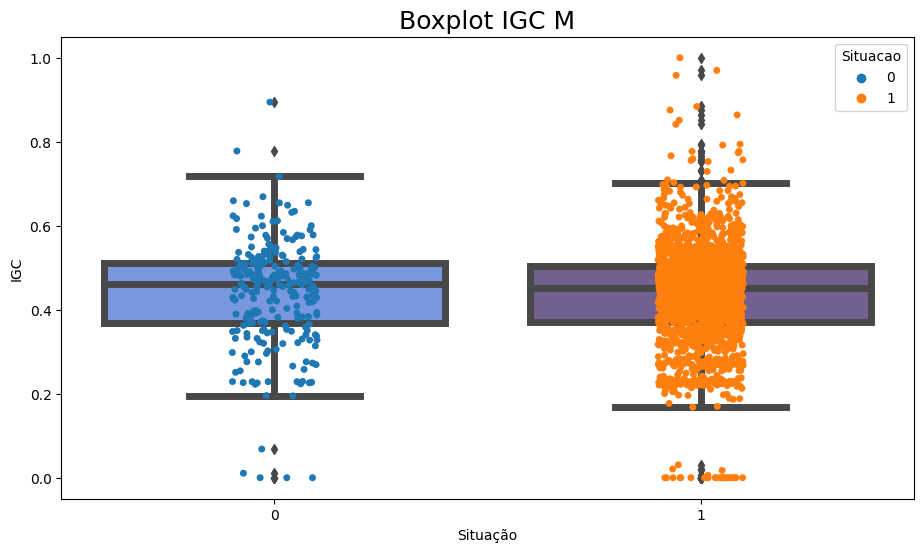

In [20]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="IGC_M",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="IGC_M", hue="Situacao" ,data = df)  

plt.title("Boxplot IGC M", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("IGC")

plt.show()

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

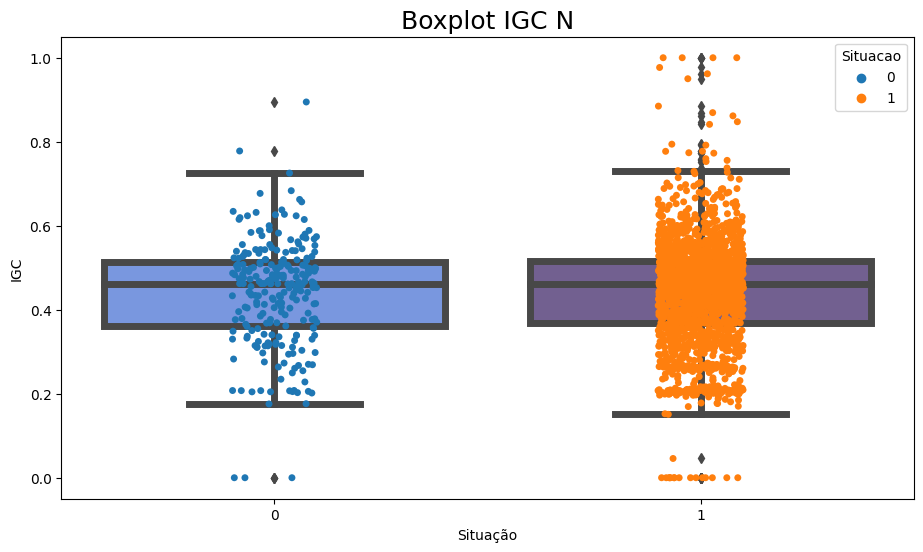

In [21]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="IGC_N",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="IGC_N", hue="Situacao" ,data = df)  

plt.title("Boxplot IGC N", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("IGC")

plt.show()

* Comparando DIAS:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

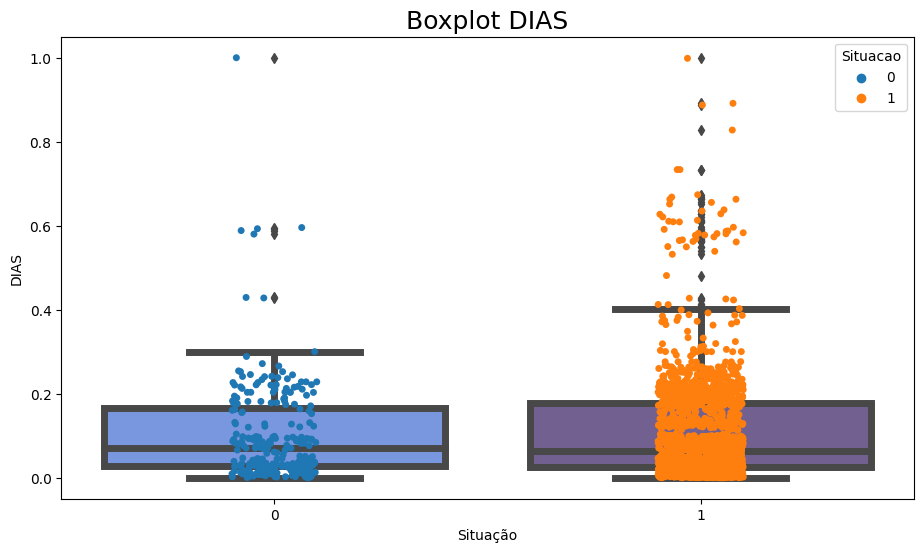

In [22]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="DIAS",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="DIAS", hue="Situacao" ,data = df)  

plt.title("Boxplot DIAS", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("DIAS")

plt.show()

* Comparando CURSOS:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

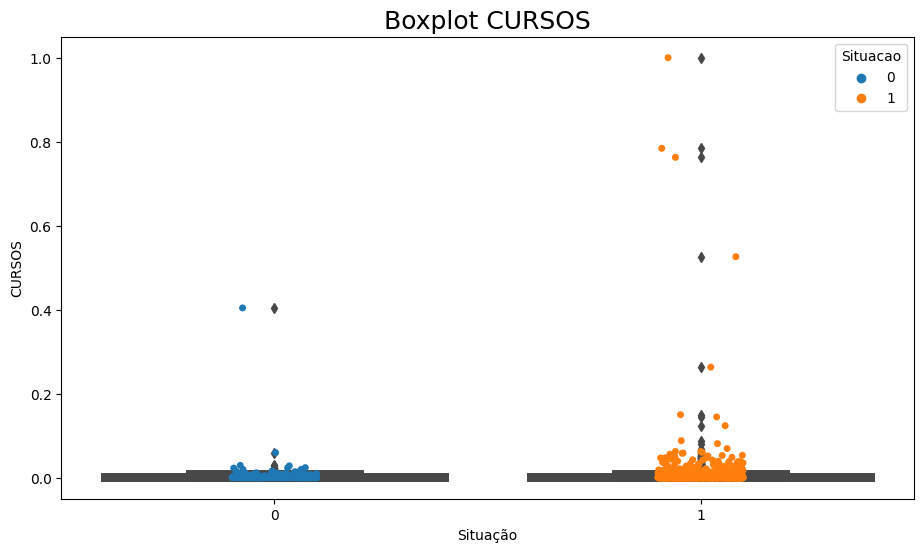

In [24]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="CURSOS",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="CURSOS", hue="Situacao" ,data = df)  

plt.title("Boxplot CURSOS", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("CURSOS")

plt.show()

* Comparando % FIES:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

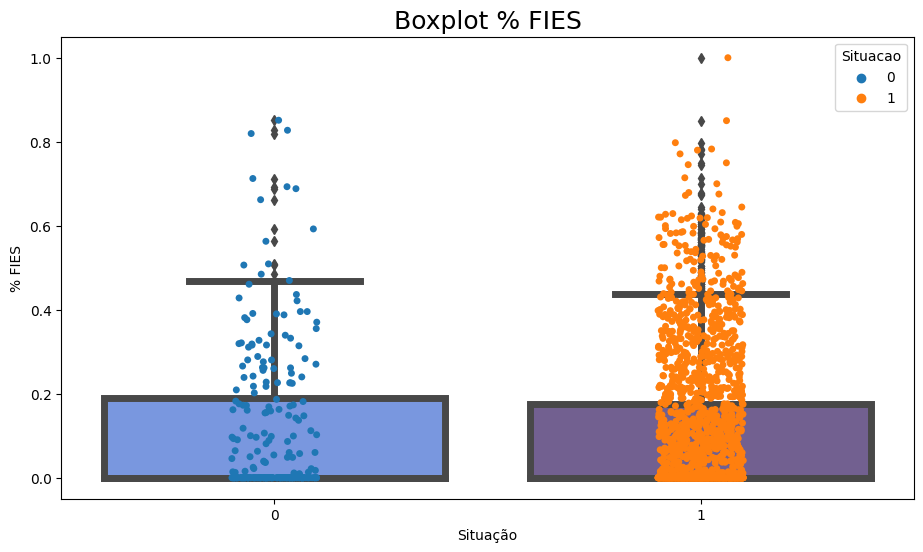

In [25]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="% FIES",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="% FIES", hue="Situacao" ,data = df)  

plt.title("Boxplot % FIES", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("% FIES")

plt.show()

* Comparando Saldo 2017:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

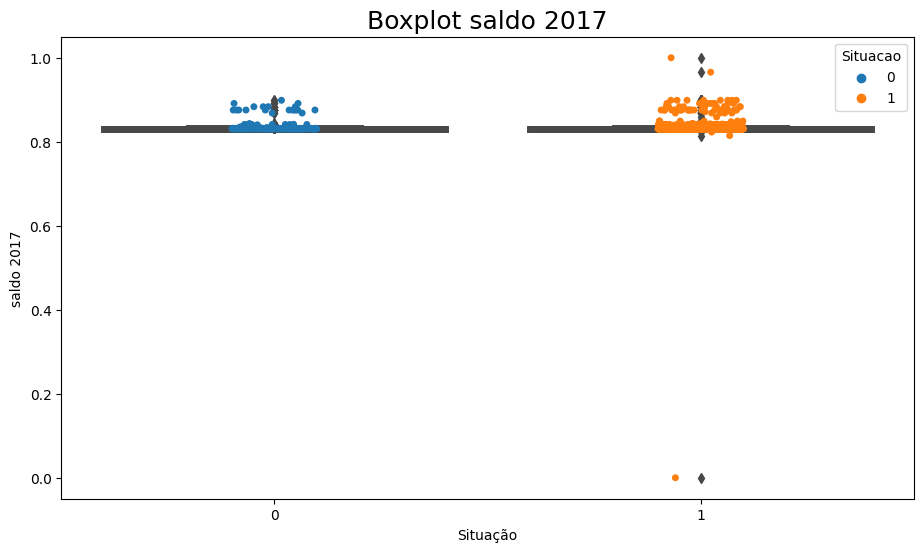

In [27]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Situacao", y ="saldo 2017",data = df, linewidth=5, palette=colors)
ax = sns.stripplot(x = "Situacao", y ="saldo 2017", hue="Situacao" ,data = df)  

plt.title("Boxplot saldo 2017", loc="center", fontsize=18)
plt.xlabel("Situação")
plt.ylabel("saldo 2017")

plt.show()

-----------------------------

### Comparação dos Pré-processamentos:

In [20]:
df_old = pd.read_csv('../../data/dataset_final.csv')
df_new = pd.read_csv('../../data/dataset_new_with_outliers.csv')

* Avaliando distribuição normal:

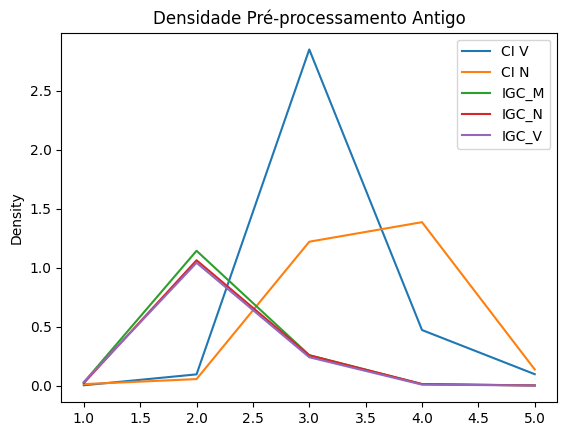

In [34]:
df_old[['CI V', 'CI N', 'IGC_M', 'IGC_N', 'IGC_V']].plot.kde(ind=[1, 2, 3, 4, 5])
plt.title('Densidade Pré-processamento Antigo')
plt.savefig('./graphs/gaussian_old.png')

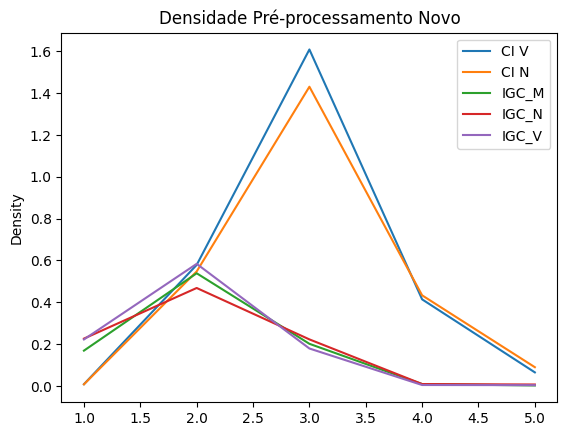

In [35]:
df_new[['CI V', 'CI N', 'IGC_M', 'IGC_N', 'IGC_V']].plot.kde(ind=[1, 2, 3, 4, 5])
plt.title('Densidade Pré-processamento Novo')
plt.savefig('./graphs/gaussian_new.png')

* Avaliando Coordenadas Paralelas:

In [36]:
fig = px.parallel_coordinates(df_old)
fig.show()
fig.write_image("./graphs/parallel_old.png")

In [37]:
fig = px.parallel_coordinates(df_new)
fig.show()
fig.write_image("./graphs/parallel_new.png")